In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

def readSpe(path,background=None):
    f=open(path,"r")
    data=f.readlines()
    values=data[12:2060]
    values=[int(row) for row in values]
    duration=int(data[9].split(" ")[0])

    countsPerMin=np.array(values)/duration*60
    if background is not None:
        countsPerMin-=np.array(background["countsPerMin"])

    df=pd.DataFrame({"bin":np.arange(0,len(values),1),
        "counts":values,
        "countsPerMin":countsPerMin,
        })
    
    return df


background=readSpe("background.Spe",None)

energyLevels=["350","375","400","425","450","475","490","500","515","540"]
energyLevels=[int(i) for i in energyLevels]
thinData={}
thickData={}
for run in energyLevels:
    thinData[int(run)]=readSpe(f"thinTarget/{run}.Spe",background)
    thickData[int(run)]=readSpe(f"thickTarget/{run}.Spe",background)

thinData["Cs137"]=readSpe("thinTarget/Cs137.Spe",background)
thickData["Cs137"]=readSpe("thickTarget/Cs137.Spe",background)
thinData["Co60"]=readSpe("thinTarget/Co60.Spe",background)
thickData["Co60"]=readSpe("thickTarget/Co60.Spe",background)



    

[]


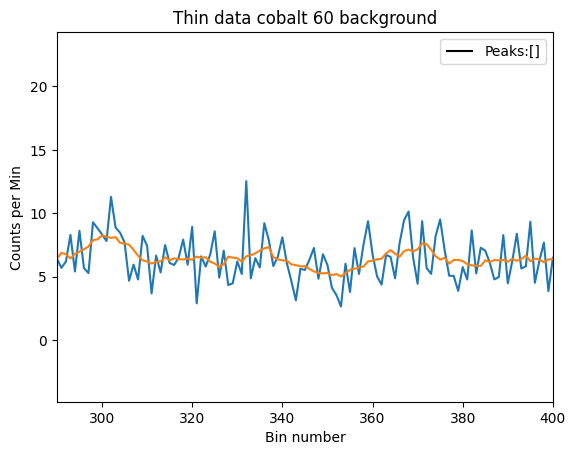

[]


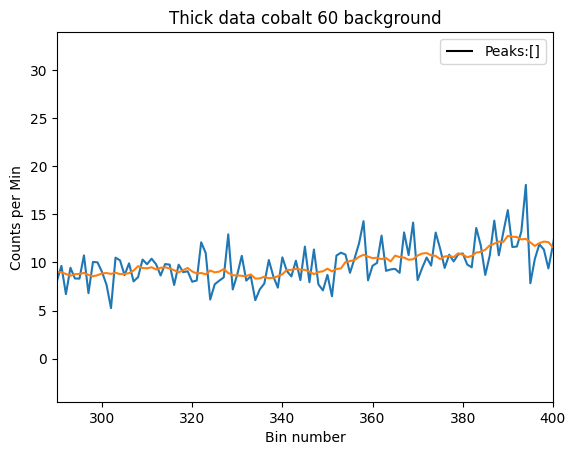

[363]


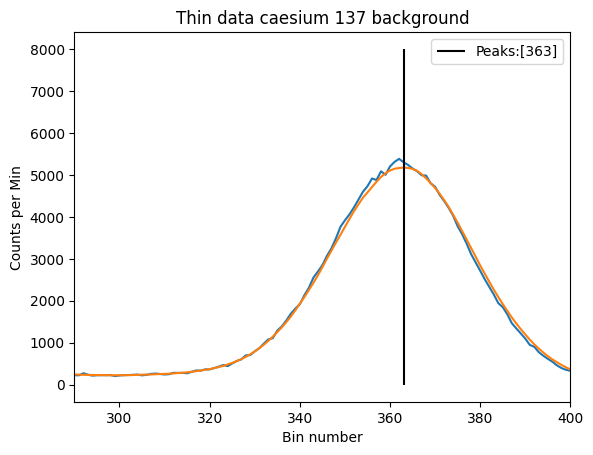

[322]


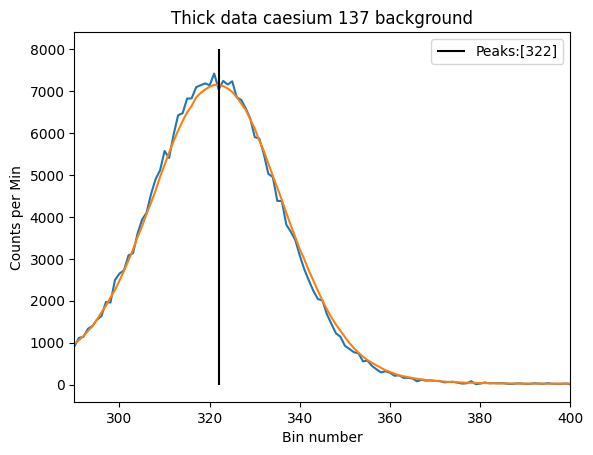

In [3]:
def getBackground(run,title=""):
    plt.plot(run["countsPerMin"])
    rollingAvg=np.convolve(run["countsPerMin"],np.ones(10),"same")/10
    plt.plot(rollingAvg)
    peaks,_=scipy.signal.find_peaks(rollingAvg,prominence=40)
    peaks=[i for i in peaks if i>300 and i<800]
    print(peaks)


    plt.vlines(peaks,-5,8000,color="k",label=f"Peaks:{peaks}")

    plt.xlim(290,400)
    plt.xlabel("Bin number")
    plt.ylabel("Counts per Min")
    plt.title(title)
    plt.legend()
    plt.show()

    

getBackground(thinData["Co60"],"Thin data cobalt 60 background")
getBackground(thickData["Co60"],"Thick data cobalt 60 background")
getBackground(thinData["Cs137"],"Thin data caesium 137 background")
getBackground(thickData["Cs137"],"Thick data caesium 137 background")



In [4]:
actualEnergy=np.array([661.60,1173.24,1332.50])
thinDataPeaks=np.array([363,633,715])
thickDataPeaks=np.array([322,561,634])

thinFactor=actualEnergy/thinDataPeaks
thickFactor=actualEnergy/thickDataPeaks

print(thinFactor.mean(),thinFactor.std())
print(thickFactor.mean(),thickFactor.std())

for run in thinData.values(): 
    run["energy"]=range(len(run["countsPerMin"]))*thinFactor.mean()

for run in thickData.values(): 
    run["energy"]=range(len(run["countsPerMin"]))*thickFactor.mean()
    



1.8465618703188715 0.01745271336990591
2.082576766420587 0.020192527053419566


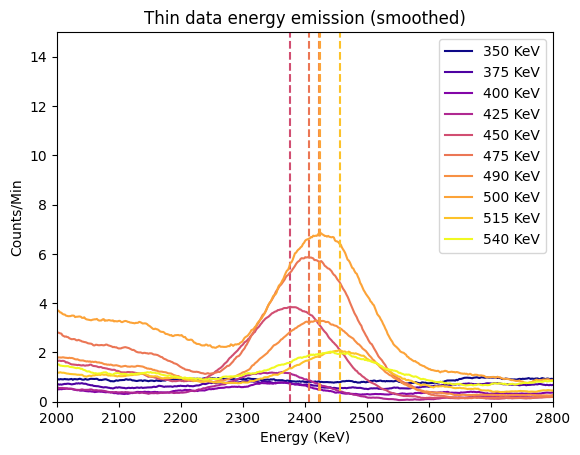

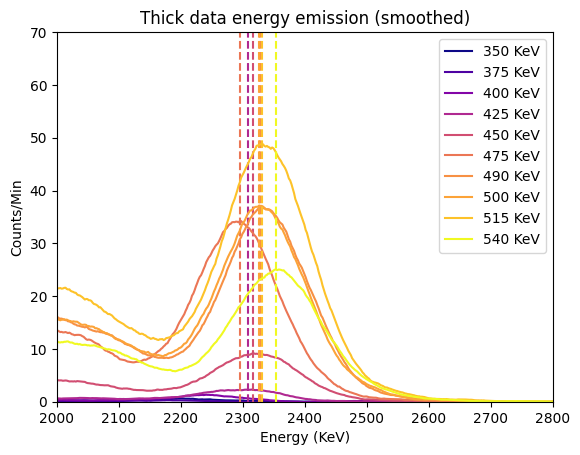

In [8]:
def plotRuns(runs,ymax=100,title="",smoothing=1):
    
    peaks={}
    for energy in energyLevels:
        xMin=2000
        xMax=2800

        color=plt.cm.plasma((energy-min(energyLevels))/(max(energyLevels)-min(energyLevels)))

        data=runs[int(energy)]
        smoothed=np.convolve(data["countsPerMin"],np.ones(smoothing),"same")/smoothing
        

        peaksI,_=scipy.signal.find_peaks(smoothed,prominence=2,distance=150)
        peaksI=[peak for peak in peaksI if data["energy"][peak]>2200 and data["energy"][peak]<2600]
        plt.vlines(data["energy"][peaksI],0,ymax,color=color,linestyles="--")
        #print(peaksI)
        if len(peaksI)>0:peaks[energy]=data["energy"][peaksI[0]]

        plt.plot(data["energy"],smoothed,color=color,label=f"{energy} KeV")
        plt.xlim(xMin,xMax)
        plt.ylim(0,ymax)

    plt.xlabel("Energy (KeV)")
    plt.ylabel("Counts/Min")
    plt.legend()
    plt.title(title)
    plt.show()

    return peaks


thinPeaks=plotRuns(thinData,ymax=15,smoothing=50,title="Thin data energy emission (smoothed)")
thickPeaks=plotRuns(thickData,ymax=70,smoothing=30,title="Thick data energy emission (smoothed)")

Text(0, 0.5, 'Peak Energy (KeV)')

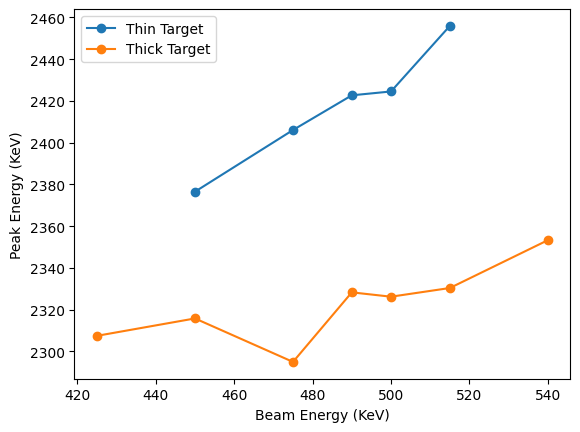

In [6]:

plt.plot(thinPeaks.keys(),thinPeaks.values(),"o-",label="Thin Target")
plt.plot(thickPeaks.keys(),thickPeaks.values(),"o-",label="Thick Target")
plt.legend()
plt.xlabel("Beam Energy (KeV)")
plt.ylabel("Peak Energy (KeV)")
    
